<a href="https://colab.research.google.com/github/PalmChalan/AI-Engineering-Coursework/blob/main/Regression/Redwine-Quality-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
!wget -N https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv

--2025-09-18 14:32:46--  https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7 [following]
--2025-09-18 14:32:46--  https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0f10327a87ac73835bdf71b1e.dl.dropboxusercontent.com/cd/0/inline/CxnpkoENt8jrX74uqLB6N-12YjJE4Go2-jfwPKWN4HBHczWL254isqQk9q0Vp5NhEybMrOZHLbtZPPjLvf9_9C1E6b0pDvOJgV6r5xlwja6TfZrK6K8VNOvWcQ-dSsu1IN8/file# [following]
--2025-09-18 14:32:46--  https://ucc0f10327a87ac73835bdf71b1e.dl.dropboxusercontent.com/cd/0/inline/C

In [ ]:
df = pd.read_csv('winequality_red.csv', sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Correlation
pd.set_option("display.precision",2)
df.corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-2.56e-01,0.67,1.15e-01,9.37e-02,-1.54e-01,-0.11,0.67,-0.68,1.83e-01,-0.06,0.12
volatile acidity,-0.26,1.00e+00,-0.55,1.92e-03,6.13e-02,-1.05e-02,0.08,0.02,0.23,-2.61e-01,-0.20,-0.39
citric acid,0.67,-5.52e-01,1.00,1.44e-01,2.04e-01,-6.10e-02,0.04,0.36,-0.54,3.13e-01,0.11,0.23
residual sugar,0.11,1.92e-03,0.14,1.00e+00,5.56e-02,1.87e-01,0.20,0.36,-0.09,5.53e-03,0.04,0.01
chlorides,0.09,6.13e-02,0.20,5.56e-02,1.00e+00,5.56e-03,0.05,0.20,-0.27,3.71e-01,-0.22,-0.13
free sulfur dioxide,-0.15,-1.05e-02,-0.06,1.87e-01,5.56e-03,1.00e+00,0.67,-0.02,0.07,5.17e-02,-0.07,-0.05
total sulfur dioxide,-0.11,7.65e-02,0.04,2.03e-01,4.74e-02,6.68e-01,1.00,0.07,-0.07,4.29e-02,-0.21,-0.19
density,0.67,2.20e-02,0.36,3.55e-01,2.01e-01,-2.19e-02,0.07,1.00,-0.34,1.49e-01,-0.50,-0.17
pH,-0.68,2.35e-01,-0.54,-8.57e-02,-2.65e-01,7.04e-02,-0.07,-0.34,1.00,-1.97e-01,0.21,-0.06
sulphates,0.18,-2.61e-01,0.31,5.53e-03,3.71e-01,5.17e-02,0.04,0.15,-0.20,1.00e+00,0.09,0.25


In [ ]:
cor = df.corr()
cor_target = abs(cor["quality"])
relevant_features = cor_target[cor_target>0.25]
relevant_features

,quality
volatile acidity,0.39
sulphates,0.25
alcohol,0.48
quality,1.00


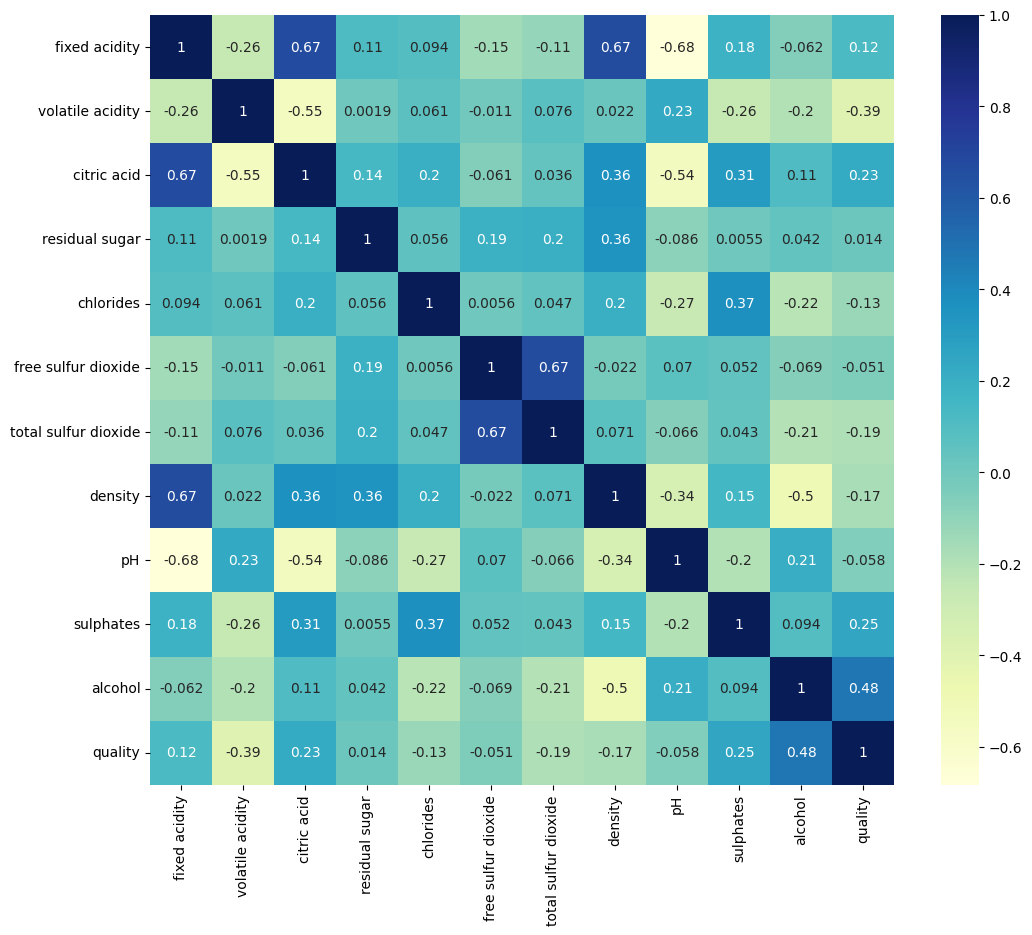

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.9818293  0.6709624  0.31803859 4.53639479 5.67501653 1.24939385
 1.51410919 0.07122077 0.19350176 2.42639346 0.86002106 0.21759721]


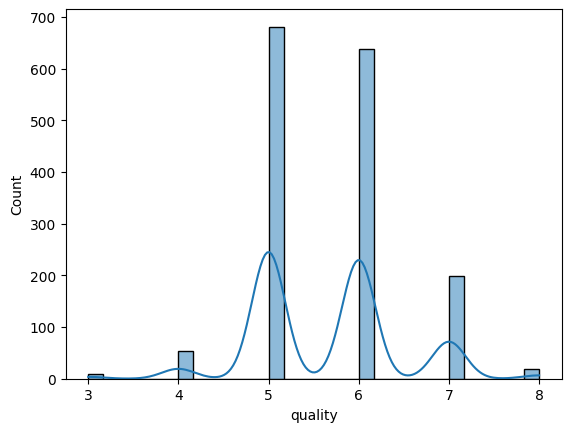

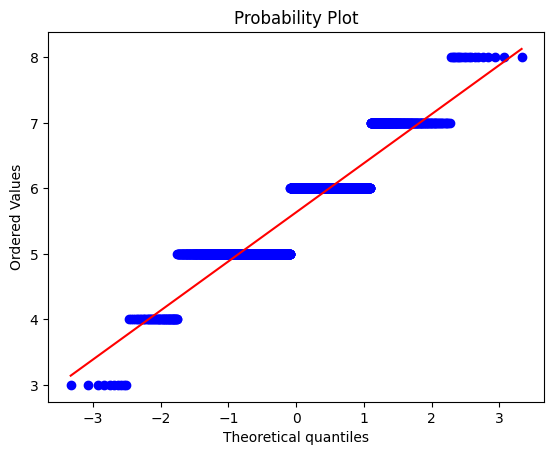

In [ ]:
from scipy import stats
#histogram and normal probability plot
print( df.columns )
print( stats.skew(df) )

sns.histplot(df["quality"], kde=True)
fig = plt.figure()
res = stats.probplot(df["quality"], plot=plt)

In [ ]:
# variable selection
x = df.drop(columns=['quality'])
x = x[['volatile acidity', 'sulphates', 'alcohol']]
y = df["quality"]
print(x.shape)
print(y.shape)

(1599, 3)
(1599,)


In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 25% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')
2.5380535718159316
[-1.24589318  0.65587012  0.32113945]


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.45
909,6,6.19


In [ ]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print( "RMSE = ", round(math.sqrt(mse),2) )
print( "Average house price =", round(y_test.mean(),2) )

# R^2
print( "R^2 = ", round(model.score(x_test,y_test),2) )

RMSE =  0.72
Average house price = 5.58
R^2 =  0.27


In [ ]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Calculate z-scores for the entire dataset (excluding the target variable)
z_scores = np.abs(zscore(df.drop(columns=['quality'])))

# Set a threshold for identifying outliers
threshold = 3

# Create a mask to identify rows with outliers
mask = (z_scores < threshold).all(axis=1)

# Filter the entire dataset to remove outliers
df_filtered = df[mask]

# Define features (x) and target (y) from the filtered data
x_filtered = df_filtered[['volatile acidity', 'sulphates', 'alcohol']]
y_filtered = df_filtered["quality"]

# Split the filtered data into training and testing sets
x_train_filtered_all, x_test_filtered_all, y_train_filtered_all, y_test_filtered_all = train_test_split(
    x_filtered, y_filtered, test_size=0.25, random_state=101
)

print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df_filtered.shape}")
print(f"Filtered training data shape: {x_train_filtered_all.shape}")
print(f"Filtered testing data shape: {x_test_filtered_all.shape}")

Original dataset shape: (1599, 12)
Filtered dataset shape: (1458, 12)
Filtered training data shape: (1093, 3)
Filtered testing data shape: (365, 3)


In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.45
909,6,6.19
...,...,...
1528,6,5.86
647,4,5.40
352,5,5.17
116,6,5.48


In [ ]:
# Re-train the model with filtered data
lm_filtered_all = LinearRegression()
model_filtered_all = lm_filtered_all.fit(x_train_filtered_all, y_train_filtered_all)

# Re-evaluate RMSE and R-squared on the filtered test set
y_pred_filtered_all = model_filtered_all.predict(x_test_filtered_all)

mse_filtered_all = mean_squared_error(y_test_filtered_all, y_pred_filtered_all)
rmse_filtered_all = np.sqrt(mse_filtered_all)
r2_filtered_all = model_filtered_all.score(x_test_filtered_all, y_test_filtered_all)

print(f"RMSE after removing outliers from all data: {rmse_filtered_all:.2f}")
print(f"R^2 after removing outliers from all data: {r2_filtered_all:.2f}")

RMSE after removing outliers from all data: 0.64
R^2 after removing outliers from all data: 0.30


**Check linearity assumption to target (corr)**

*   กำหนดค่า Corr = 0.25 เพื่อให้ได้ model ที่มีค่า R^2 สูงที่สุด

**Select variables**

*   volatile acidity, sulphates, alcohol

**Create model & report equation**

*   Quality (y) = 2.54 + -1.25volatile acidity + 0.66sulphates + 0.32alcohol

**Predict & evaluate RMSE & R2 on test set**

*   RMSE = 0.72
*   R^2 = 0.27

**Are there any predicted value out of range?**

* There is no out-of-range value

**Improve your model (post-processing)**

*   Improve the model by using Z-Score method to remove outlier from the data

**Re-evaluate RMSE & on R-square on test set**

*   RMSE = 0.64
*   R^2 = 0.3

